## Exploratory Data Analysis: Breast Cancer

# Business Problem

### In this study, we aim to perform exploratory data analysis using the breast cancer dataset

## Dataset Story

This dataset of breast cancer patients was obtained from the 2017 November update of the SEER Program of the NCI, which provides information on population-based cancer statistics. The dataset involved female patients with infiltrating duct and lobular carcinoma breast cancer (SEER primary cites recode NOS histology codes 8522/3) diagnosed in 2006-2010. Patients with unknown tumour size, examined regional LNs, positive regional LNs, and patients whose survival months were less than 1 month were excluded; thus, 4024 patients were ultimately included.

# Import Necessary Libraries

In [5]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import math

# Settings 
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.width", 500)
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# İmport Dataset

In [12]:
def load_dataset(path):
    df = pd.read_csv(path)
    return df

# General Information About to Dataset

In [15]:
def check_df(dataframe,head=5):
    print(20*"#", "HEAD", 20*"#")
    print(dataframe.head(head))
    print(20*"#", "TAIL", 20*"#")
    print(dataframe.tail(head))
    print(20*"#", "SHAPE", 20*"#")
    print(dataframe.shape)
    print(20*"#", "TYPES", 20*"#")
    print(dataframe.dtypes)
    print(20*"#", "NA", 20*"#")
    print(dataframe.isnull().sum())
    print(20*"#", "QUARTILES", 20*"#")
    print(dataframe.describe([0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]).T)

# Analysis of Categorical and Numerical Veriables

In [73]:
def grab_col_names(dataframe, cat_th=10, car_th=20, report=False):
    #category
    cat_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["category", "object", "bool"]]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes in ["uint8", "int64","float64"]]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and str(dataframe[col].dtypes) in ["category","object"]]
    cat_cols = cat_cols + num_but_cat
    #numerical
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes in ["unit8","int64","float64"]]
    num_cols = [col for col in num_cols if col not in cat_cols]
    #report
    if report:
        print(f"Observation(Gözlem): {dataframe.shape[0]}")
        print(f"Variables:{dataframe.shape[1]}")
        print(f"Categorical Columns: {len(cat_cols)}")
        print(f"Numerical Columns: {len(num_cols)}")
        print(f"Categrical But Cardinality: {len(cat_but_car)}")
        print(f"Numerical But Caterogical: {len(num_but_cat)}")
    return cat_cols, num_but_cat, cat_but_car, num_cols

In [75]:
def cat_summary(dataframe, col_name, plot=False):
    print(20*"#", col_name, 20*"#")
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                       "Ratio": 100 * dataframe[col_name].value_counts() / len(dataframe) }))
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show()

In [77]:
def cat_summary_df(dataframe):
    cat_cols, num_but_cat, cat_but_car, num_cols = grab_col_names(dataframe)
    for col in cat_cols:
        if dataframe[col].dtypes == "bool":
            new_df = pd.DataFrame()
            new_df[col] = dataframe[col].astype("int")
            cat_summary(new_df, col, plot=True)
    
        else:
            cat_summary(dataframe, col, plot=True)

In [79]:
def num_summary(dataframe, col_name, plot=False):
    print(20*"#", col_name, 20*"#")
    quantiles = [0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.95,0.99]
    print(dataframe[col_name].describe().T)
    if plot:
        dataframe[col_name].hist(bins = 20)
        plt.xlabel(col_name)
        plt.ylabel(col_name)
        plt.show()

In [81]:
def num_summary_df(dataframe):
    cat_cols, num_but_cat, cat_but_car, num_cols = grab_col_names(dataframe)
    for col in num_cols:
        num_summary(dataframe, col, plot=True)

In [83]:
def plot_num_summary(dataframe):
    cat_cols, num_but_cat, cat_but_car, num_cols = grab_col_names(dataframe)
    num_plots = len(num_cols)
    rows = math.ceil(num_plots/2)
    cols = 2 if num_plots > 1 else 1  
    plt.figure(figsize=(10*cols,4*rows))
    for index, col in enumerate(num_cols):
        plt.subplot(rows,cols, index + 1)
        plt.tight_layout()
        dataframe[col].hist(bins=20)
        plt.title(col)

## Target Analysis

In [86]:
def target_salary_with_num(dataframe, target, numerical_col):
    print(20*"#", target, "===>", numerical_col, 20*"#")
    print(dataframe.groupby(target)[numerical_col].mean())

In [88]:
def target_summary_with_num_df(dataframe, target):
    cat_cols, num_but_cat, cat_but_car, num_cols = grab_col_names(dataframe)
    for col in num_cols:
        target_salary_with_num(dataframe, target, col)

In [90]:
def target_summary_with_cat(dataframe, target, categorical_col):
    print(20*"#", target, "===>", categorical_col, 20*"#")
    print(dataframe.groupby(categorical_col)[target].mean())

In [92]:
def target_summary_with_cat_df(dataframe, target):
    cat_cols, num_but_cat, cat_but_car, num_cols = grab_col_names(dataframe)
    for col in cat_cols:
        target_summary_with_cat(dataframe, target, col)

## Correlation Analysis

In [95]:
def high_correlated_cols(dataframe, corr_th=0.90, remove = False, plot=False):
    num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["unit8", "int64","float64"]]
    corr = dataframe[num_cols].corr()
    corr_matrix = corr.abs()
    upper_triangle_matrix = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k = 1).astype(bool))
    drop_list = [col for col in  upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    if drop_list == []:
        print(20*"#", " After Coleration analaysis, yo do not need to remove veriables", 20*"#")
    if remove:
        dataframe = dataframe.drop(drop_list, axis=1)
    if plot: 
        num_cols = [col for col in dataframe.columns if str(dataframe[col].dtypes) in ["unit8", "int64","float64"]]
        sns.set(rc = {'figure.figsize': (6,4)})
        sns.heatmap(dataframe[num_cols].corr(), cmap = "RdBu", annot = True, fmt = ".2f")
        plt.show()
    return drop_list

## Pipeline

In [98]:
def main(path_dataset, target, corr_th=0.90):
    df = load_dataset(path_dataset)
    print(20*"#", "General Information About to Datset", 20*"#")
    check_df(df)
    print(20*"#", "Analaysis of Categorical and Numerical Variables", 20*"#")
    cat_cols, num_but_cat, cat_but_car, num_cols = grab_col_names(df, report=True)
    cat_summary_df(df)
    num_summary_df(df)
    if len(num_cols) > 1:
        print(20*"#", "Target Analysis - Numerical", 20*"#")
        target_summary_with_num_df(df, target)
    print(20*"#", "Correlation Analysis", 20*"#")
    drop_list = high_correlated_cols(df, corr_th=corr_th, remove=True, plot=True)
    print(20*"#", "Plot All Numerical Variables", 20*"#")
    plot_num_summary(df)

#################### General Information About to Datset ####################
#################### HEAD ####################
   Age   Race Marital Status T Stage  N Stage 6th Stage              differentiate Grade   A Stage  Tumor Size Estrogen Status Progesterone Status  Regional Node Examined  Reginol Node Positive  Survival Months Status
0   68  White        Married       T1      N1       IIA      Poorly differentiated     3  Regional           4        Positive            Positive                      24                      1               60  Alive
1   50  White        Married       T2      N2      IIIA  Moderately differentiated     2  Regional          35        Positive            Positive                      14                      5               62  Alive
2   58  White       Divorced       T3      N3      IIIC  Moderately differentiated     2  Regional          63        Positive            Positive                      14                      7               75  Alive
3  

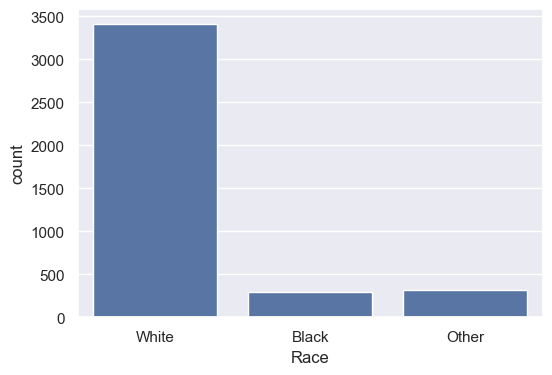

#################### Marital Status ####################
                Marital Status  Ratio
Marital Status                       
Married                   2643 65.681
Single                     615 15.283
Divorced                   486 12.078
Widowed                    235  5.840
Separated                   45  1.118


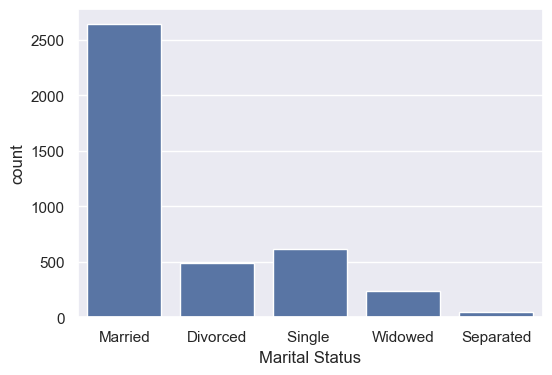

#################### T Stage  ####################
          T Stage   Ratio
T Stage                  
T2            1786 44.384
T1            1603 39.836
T3             533 13.246
T4             102  2.535


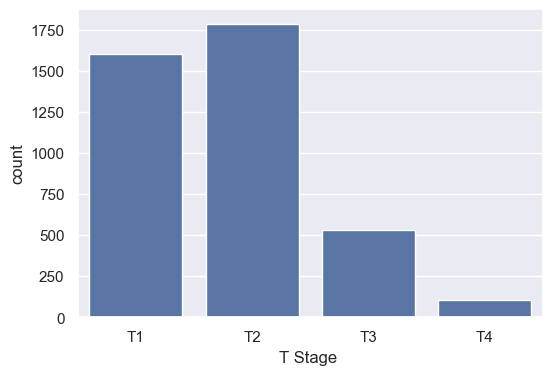

#################### N Stage ####################
         N Stage  Ratio
N Stage                
N1          2732 67.893
N2           820 20.378
N3           472 11.730


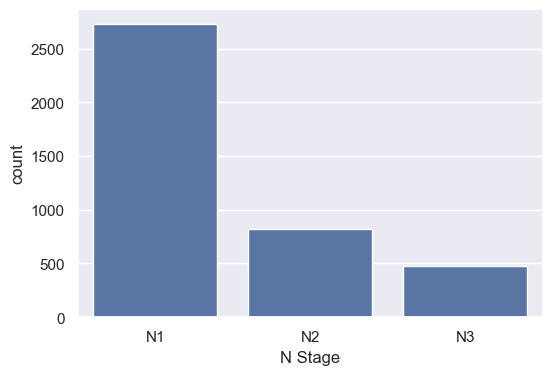

#################### 6th Stage ####################
           6th Stage  Ratio
6th Stage                  
IIA             1305 32.430
IIB             1130 28.082
IIIA            1050 26.093
IIIC             472 11.730
IIIB              67  1.665


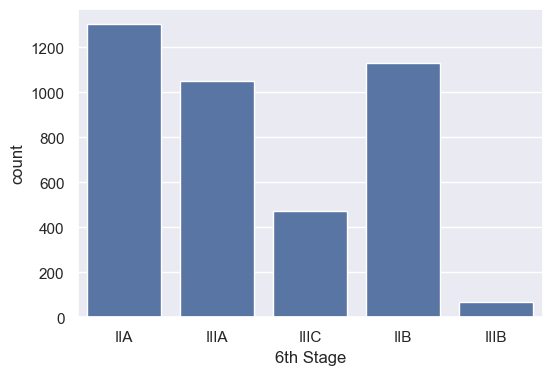

#################### differentiate ####################
                           differentiate  Ratio
differentiate                                  
Moderately differentiated           2351 58.424
Poorly differentiated               1111 27.609
Well differentiated                  543 13.494
Undifferentiated                      19  0.472


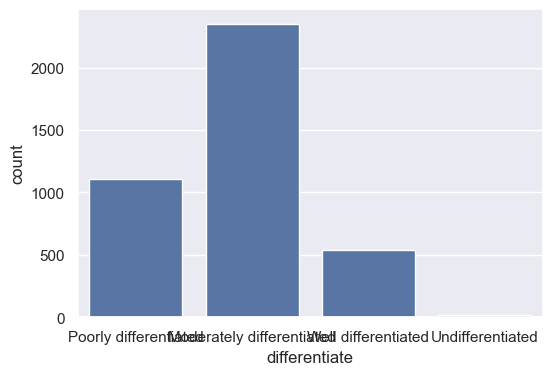

#################### Grade ####################
                       Grade  Ratio
Grade                              
2                       2351 58.424
3                       1111 27.609
1                        543 13.494
 anaplastic; Grade IV     19  0.472


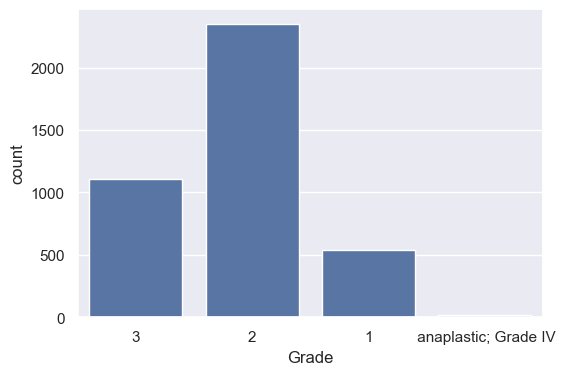

#################### A Stage ####################
          A Stage  Ratio
A Stage                 
Regional     3932 97.714
Distant        92  2.286


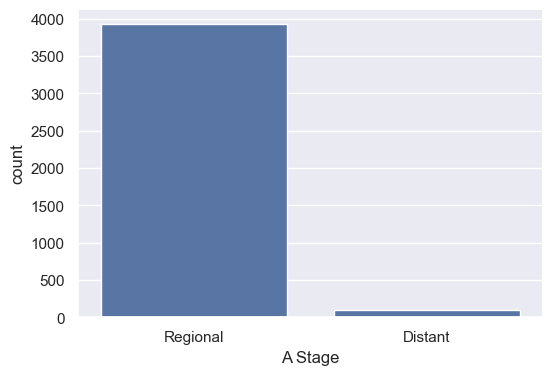

#################### Estrogen Status ####################
                 Estrogen Status  Ratio
Estrogen Status                        
Positive                    3755 93.315
Negative                     269  6.685


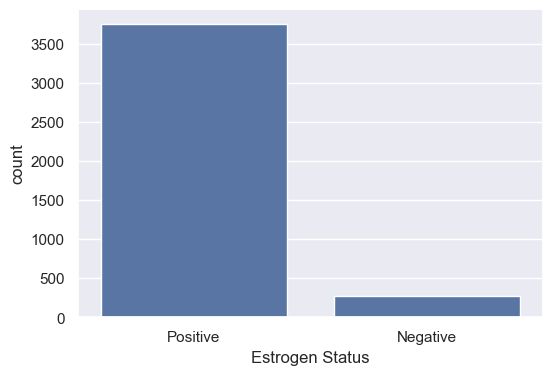

#################### Progesterone Status ####################
                     Progesterone Status  Ratio
Progesterone Status                            
Positive                            3326 82.654
Negative                             698 17.346


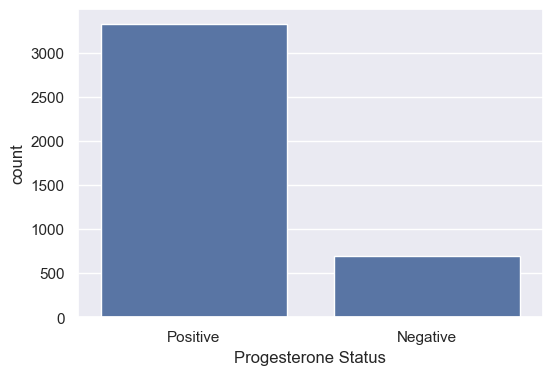

#################### Status ####################
        Status  Ratio
Status               
Alive     3408 84.692
Dead       616 15.308


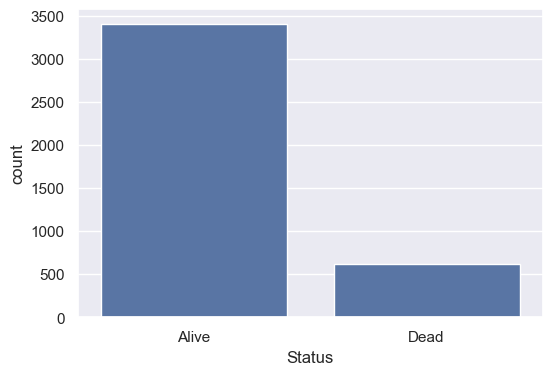

#################### Age ####################
count   4024.000
mean      53.972
std        8.963
min       30.000
25%       47.000
50%       54.000
75%       61.000
max       69.000
Name: Age, dtype: float64


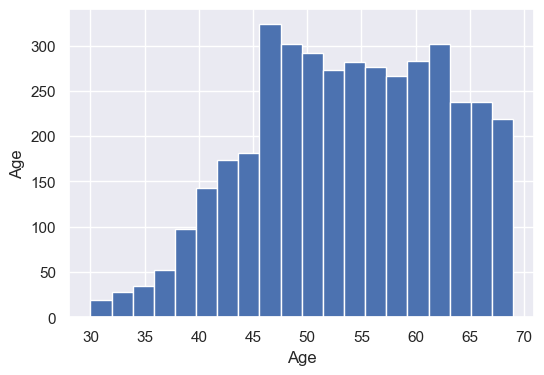

#################### Tumor Size ####################
count   4024.000
mean      30.474
std       21.120
min        1.000
25%       16.000
50%       25.000
75%       38.000
max      140.000
Name: Tumor Size, dtype: float64


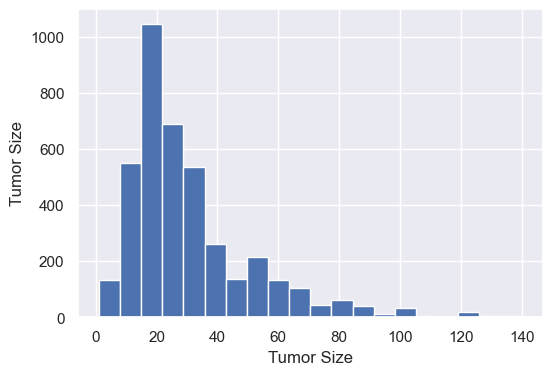

#################### Regional Node Examined ####################
count   4024.000
mean      14.357
std        8.100
min        1.000
25%        9.000
50%       14.000
75%       19.000
max       61.000
Name: Regional Node Examined, dtype: float64


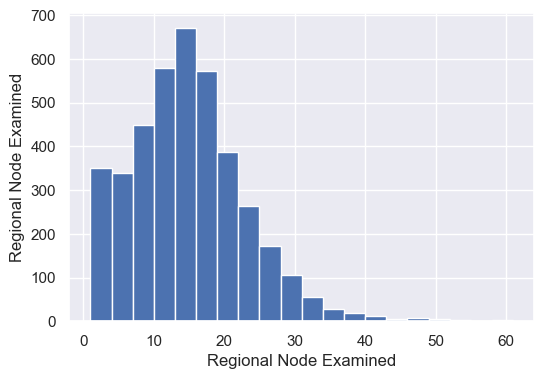

#################### Reginol Node Positive ####################
count   4024.000
mean       4.158
std        5.109
min        1.000
25%        1.000
50%        2.000
75%        5.000
max       46.000
Name: Reginol Node Positive, dtype: float64


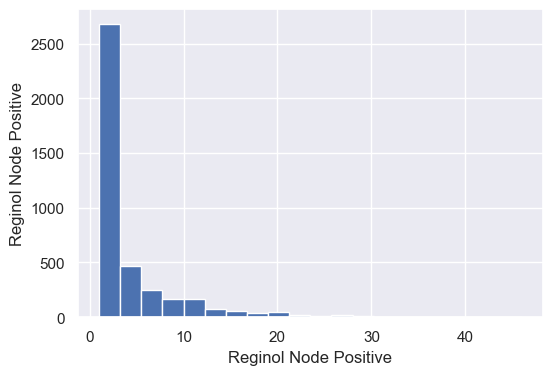

#################### Survival Months ####################
count   4024.000
mean      71.298
std       22.921
min        1.000
25%       56.000
50%       73.000
75%       90.000
max      107.000
Name: Survival Months, dtype: float64


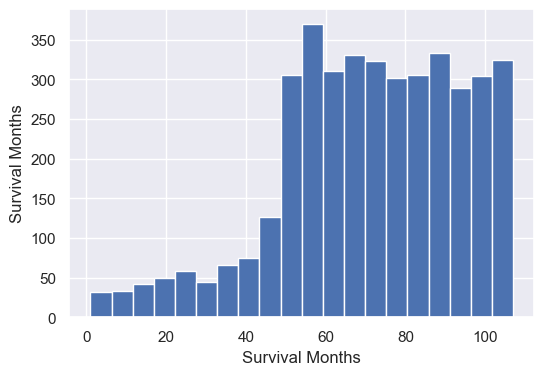

#################### Target Analysis - Numerical ####################
#################### Status ===> Age ####################
Status
Alive   53.759
Dead    55.151
Name: Age, dtype: float64
#################### Status ===> Tumor Size ####################
Status
Alive   29.269
Dead    37.140
Name: Tumor Size, dtype: float64
#################### Status ===> Regional Node Examined ####################
Status
Alive   14.237
Dead    15.019
Name: Regional Node Examined, dtype: float64
#################### Status ===> Reginol Node Positive ####################
Status
Alive   3.601
Dead    7.242
Name: Reginol Node Positive, dtype: float64
#################### Status ===> Survival Months ####################
Status
Alive   75.941
Dead    45.610
Name: Survival Months, dtype: float64
#################### Correlation Analysis ####################
####################  After Coleration analaysis, yo do not need to remove veriables ####################


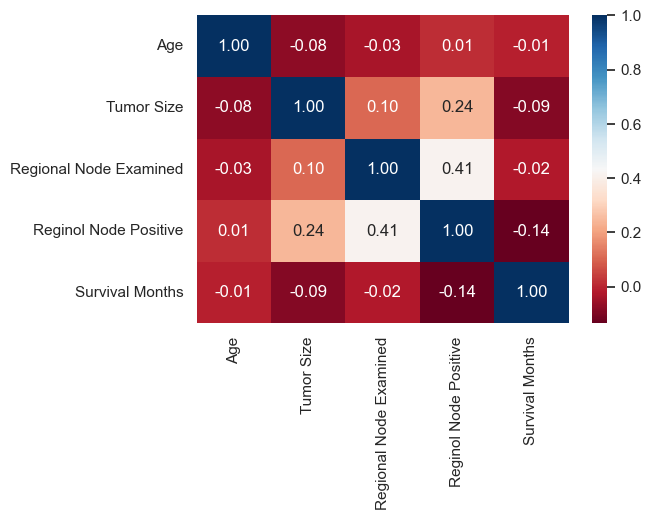

#################### Plot All Numerical Variables ####################


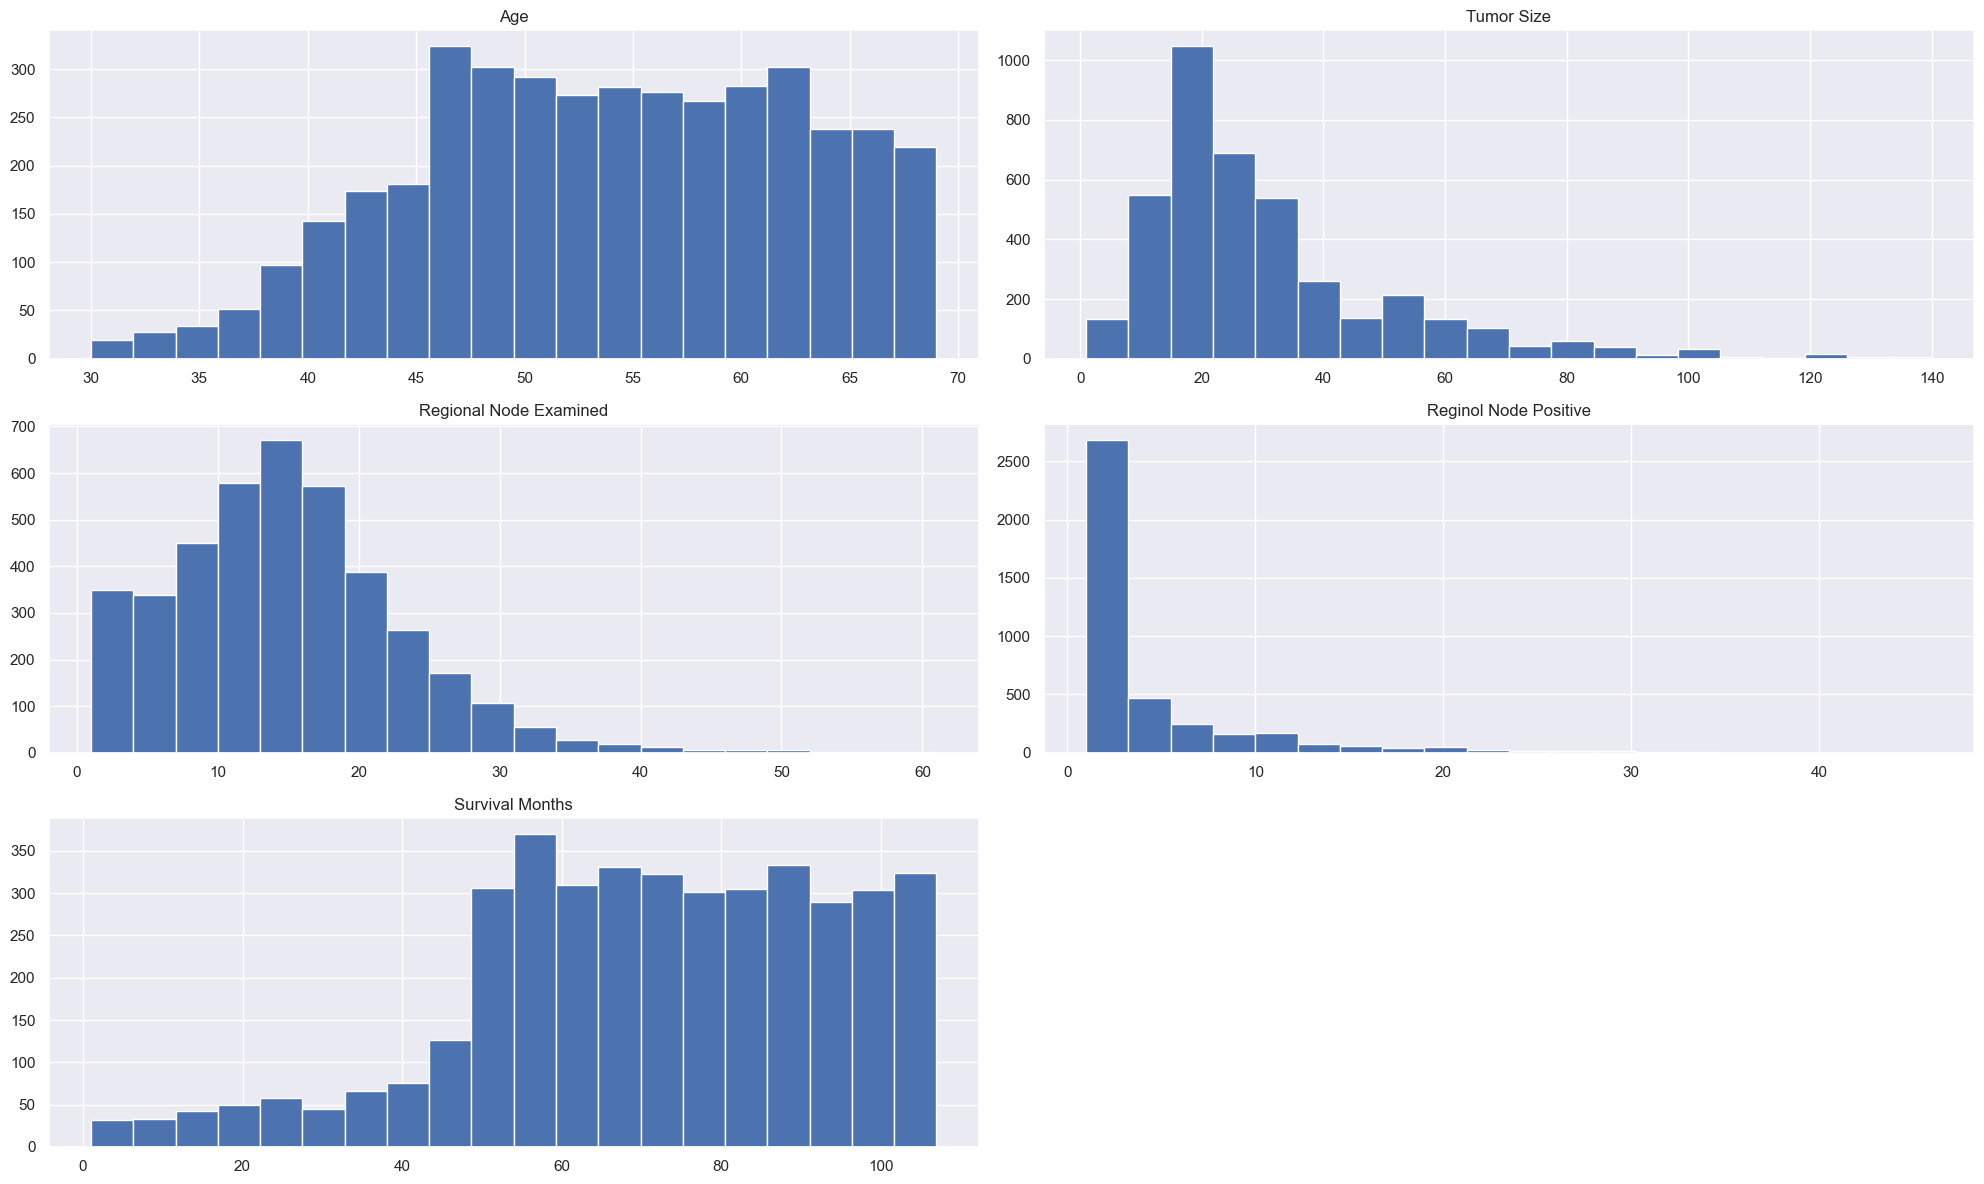

In [100]:
if __name__ == "__main__":
    main("Breast_Cancer.csv","Status")